742.3454261076436


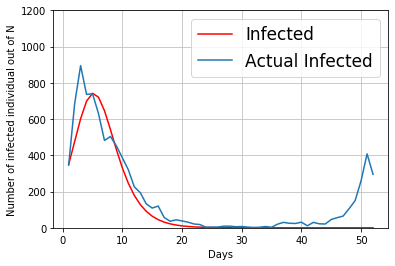

<Figure size 7200x4800 with 0 Axes>

Optimal parameters: beta = 1.431099224782581  and gamma =  1.0548340008913535
The theretical peak of the infect is 742.3454261076436
The actual peak of the infection is 895.0


In [8]:
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.optimize import curve_fit
from scipy.integrate import odeint
import numpy as np 
import pandas as pd

#read in Flu dataset
Flu_Data = pd.read_csv ("JPA_Flu_data.csv")
Flu_Data = np.array(Flu_Data)
t = Flu_Data[:,0]

#total population 
N = 126500000 / 10**4
#Initial number of infected: 
I0 = 350 
#Number of initial recovered: 
R0 = 0
#The number of susceptible: 
S0 = N - I0 - R0


Y0 = S0, I0, R0

xdata = t 
ydata = Flu_Data[:,1]


def SIR (y, t, N, beta, gamma):
    S, I, R = y
    dSdt = (-beta * S * I)/N
    dIdt = (beta * S * I)/N - gamma * I
    dRdt = (gamma*I)/N
    return dSdt, dIdt, dRdt
    
def fit_ode(x, beta, gamma):
    return odeint(SIR, Y0, t, args = (N, beta, gamma))[:,1]

popt, pcov = curve_fit(fit_ode, xdata, ydata)
fitted = fit_ode(xdata, *popt)
beta = popt[0]
gamma = popt[1] 


def SIR (y, t, N, beta, gamma):
    S, I, R = y
    dSdt = (-beta * S * I)/N
    dIdt = (beta * S * I)/N - gamma * I
    dRdt = (gamma*I)/N
    return dSdt, dIdt, dRdt
#Initial condition vector: 
Y0 = S0, I0, R0

sol = odeint(SIR, Y0, t, args = (N, beta, gamma))
S, I, R = sol.T
print (max(I))

def Imax(): 
    return -(gamma/beta) + (gamma/beta * np.log(gamma/beta)) + S0+ I0 - (gamma/beta*np.log(S0))

  


#Graphs the eqation
# plt.plot (t, S, c= "b", label = 'Susceptible')
plt.plot (t, I, c="r", label = 'Infected')
# plt.plot (t, R, c="g",label = 'Recovered')
plt.plot (t, ydata, label = "Actual Infected")

plt.ylabel("Number of infected individual out of N") 
plt.xlabel ('Days')
plt.legend(prop={"size":17})
plt.ylim (0, 1200)
plt.savefig('Japan_Flu_SIR_Infected.png', dpi = 1000)
plt.grid(color = "0.75")
plt.figure(dpi=1200)
plt.show() 
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])

print ("The theretical peak of the infect is", max(I))
print ("The actual peak of the infection is", max(ydata))
